# About Author
___
## Muhammad Ahsan Rabbi (Ihsan BT)
### Kaggle ID: Ihsan BT
### Email ID: ahsanrabbi@gmail.com
### Data Scientist | Data Analyst


# Purpose of Study
___
This study is aimed to conduct the data exploration, ML and prediction of the heart disease using UCI heart disease data having different core features which link to the heart diseases in an individial. Some of the major tasks perfomed in this notebook are listed below:
1. Data Exploration
2. Data Cleaning
3. Feature Engineering
4. Hyperparameter Tunning
5. Model Selection
6. Training Model for Prediction

All steps are well explained with the reason for being applied in the study.

# About Dataframe
---
The UCI Heart Disease dataset contains a collection of features that are used to predict the presence of heart disease in patients. Each row in the dataset represents a different patient, and the columns represent various attributes related to their health and heart disease status.
  ## Dataset Features
- **Number of Instances/Patients:** (The data is taken from 920 different patients)
- **Number of Attributes/Features:** (There are 15 different features excluding the target variable i.e. presence of heart disease in the patient)
- **Target Variable:** `num` (This indicates the presence of heart disease in the patient)

## Descriptions of each Column/Feature

Below is a brief description of each feature included in the dfset:
- `id`: Unique identifier for each patient.
- `age`: Age of the patient in years.
- `origin`: Place of study where the df was collected.
- `sex`: Gender of the patient. Values are Male or Female.
- `cp`: Chest pain type. Categories include:
  - `typical angina`
  - `atypical angina`
  - `non-anginal`
  - `asymptomatic`
- `trestbps`: Resting blood pressure in mm Hg on admission to the hospital.
- `chol`: Serum cholesterol in mg/dl.
- `fbs`: Indicates if fasting blood sugar is greater than 120 mg/dl (True or False)
- `restecg`: Resting electrocardiographic results. Categories include:
  - `normal`
  - `stt abnormality`
  - `lv hypertrophy`
- `thalach`: Maximum heart rate achieved.
- `exang`: Exercise-induced angina (True or False).
- `oldpeak`: ST depression induced by exercise relative to rest.
- `slope`: The slope of the peak exercise ST segment.
- `ca`: Number of major vessels (0-3) colored by fluoroscopy.
- `thal`: Thalassemia category. Categories include:
  - `normal`
  - `fixed defect`
  - `reversible defect`
- `num`: The predicted attribute, diagnosis of heart disease (angiographic disease status). It is typically used to indicate the presence and severity of heart disease based on angiographic disease status. The values of num generally range from 0 to 4, with each number representing a different level of severity:
  - 0: No presence of heart disease.
  - 1: Mild or some presence of heart disease.
  - 2: Moderate presence of heart disease.
  - 3: Severe presence of heart disease.
  - 4: Very severe presence of heart disease.

## Acknowledgements for Data Collection
---
- Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
- University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
- University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
- V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

# Importing Libraries & Packages

In [1]:
# importing necessary libraries & Packages for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer, SimpleImputer
from mlxtend.feature_selection import ExhaustiveFeatureSelector, SequentialFeatureSelector
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import os
import sys
from time import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

# setting options to show maximum of row and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# disabling Warnings
import warnings
warnings.simplefilter(action='ignore')

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
/tmp/ipykernel_18/2634809285.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling

# Importing Data

In [2]:
# importing Data of Heart Disease
df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

# Understanding the Data

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

## _Data Types_
Knowing the data types is necessary because it provides us the information that how the values in each column are stored and interpreted. Numeric columns (int64 and float64) typically represent quantitative variables, while object columns usually represent categorical or textual data.

In fact, to perform various analyses or modeling tasks, it is necessary to convert certain columns to different data types as per the requirement of the model and operations. For instance, converting categorical variables to numerical representation.

## _Descriptive Statistics of the Data_
Descriptive statistics provide a summary of the central tendency, variability, and range of the data. It helps in understanding the distribution and characteristics of each variable, identifying outliers, and gaining insights into the dataset without reading into the each data point.

In [5]:
df.describe().round(2)

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.00,920.00,861.00,890.00,865.00,858.00,309.00,920.00
mean,460.50,53.51,132.13,199.13,137.55,0.88,0.68,1.00
std,265.73,9.42,19.07,110.78,25.93,1.09,0.94,1.14
min,1.00,28.00,0.00,0.00,60.00,-2.60,0.00,0.00
25%,230.75,47.00,120.00,175.00,120.00,0.00,0.00,0.00
50%,460.50,54.00,130.00,223.00,140.00,0.50,0.00,1.00
75%,690.25,60.00,140.00,268.00,157.00,1.50,1.00,2.00
max,920.00,77.00,200.00,603.00,202.00,6.20,3.00,4.00


In [6]:
print(f"1. There are no heart diseases found in the 25% of the patients with an average age of {df.describe().loc['25%', 'age']}.")
print(f"2. There is mild presence of heart diseases found in the 50% of the patients with an average age of {df.describe().loc['50%', 'age']}.")
print(f"3. There is moderate presence of heart diseases found in the 75% of the patients with an average age of {df.describe().loc['75%', 'age']} and above.")

1. There are no heart diseases found in the 25% of the patients with an average age of 47.0.
2. There is mild presence of heart diseases found in the 50% of the patients with an average age of 54.0.
3. There is moderate presence of heart diseases found in the 75% of the patients with an average age of 60.0 and above.


# Data Cleaning
___
## _Handling Missing Values_
For the data cleaning, the foremost step is to handle the missing values. It ensures not only the completion of the data but also the quality of the data analysis and findings.

In [7]:
# Calculate the percentage of null values in the dataset
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

ca          66.41
thal        52.83
slope       33.59
fbs          9.78
oldpeak      6.74
trestbps     6.41
thalch       5.98
exang        5.98
chol         3.26
restecg      0.22
id           0.00
age          0.00
sex          0.00
dataset      0.00
cp           0.00
num          0.00
dtype: float64

# Data selection & Sampling

In [8]:
# Drop rows with null values of column `ca`
df = df[df['ca'].notnull()]
# drop id and dataset column which are irrelevant
df = df.drop(['id', 'dataset'], axis=1)

Due to the substantial number of missing values in the `ca` column, it is deemed inappropriate for imputation. Consequently, we are opting to retain observations with valid `ca` values. Additionally, we are excluding irrelevant columns such as `id` and `dataset` from the dataset, as they do not provide specific or crucial information. 

In [9]:
# Calculate the percentage of null values in the dataset
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

thal        3.24
fbs         1.62
slope       0.97
chol        0.32
age         0.00
sex         0.00
cp          0.00
trestbps    0.00
restecg     0.00
thalch      0.00
exang       0.00
oldpeak     0.00
ca          0.00
num         0.00
dtype: float64

Upon filtering the data based on the `ca` criterion, it is observed that minor missing values persist in the dataset. As the missing values in each column are below 5%, we can proceed with imputation using a `simple imputer` without compromising the accuracy and reliability of the data. 

In [10]:
# select only object columns
df_cat = df.select_dtypes(include='object')
# select only numeric columns
df_num = df.select_dtypes(exclude='object').drop('num',axis=1)

In [11]:
df_num.columns

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca'], dtype='object')

# Imputing Missing Values using Simple Imputer 

In [12]:
# Create a SimpleImputer with the strategy 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Transform and replace the missing values with the most frequent value
df.loc[:,'thal'] = imputer.fit_transform(df[['thal']])
# Transform and replace the missing values with the most frequent value
df.loc[:, 'fbs']= imputer.fit_transform(df[['fbs']])
# Transform and replace the missing values with the most frequent value
df.loc[:, 'slope']= imputer.fit_transform(df[['slope']])
# Transform and replace the missing values with the most frequent value
df.loc[:, 'chol']= imputer.fit_transform(df[['chol']])

In [13]:
# Calculate the percentage of null values in the dataset
round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalch      0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
num         0.0
dtype: float64

# Encoding the Data

In [14]:
# Specify the columns to encode
columns_to_encode = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Initialize a dictionary to store encoders
column_encoders = {}

# Encode each column using a separate encoder
for column in columns_to_encode:
    if column in df.columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column])
        column_encoders[column] = encoder

# Display the updated DataFrame
print(df)

# Access individual encoders
for column, encoder in column_encoders.items():
    print(f"Encoder for {column}: {encoder}")

     age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0     63    1   3     145.0  233.0    1        0   150.0      0      2.3   
1     67    1   0     160.0  286.0    0        0   108.0      1      1.5   
2     67    1   0     120.0  229.0    0        0   129.0      1      2.6   
3     37    1   2     130.0  250.0    0        1   187.0      0      3.5   
4     41    0   1     130.0  204.0    0        0   172.0      0      1.4   
5     56    1   1     120.0  236.0    0        1   178.0      0      0.8   
6     62    0   0     140.0  268.0    0        0   160.0      0      3.6   
7     57    0   0     120.0  354.0    0        1   163.0      1      0.6   
8     63    1   0     130.0  254.0    0        0   147.0      0      1.4   
9     53    1   0     140.0  203.0    1        0   155.0      1      3.1   
10    57    1   0     140.0  192.0    0        1   148.0      0      0.4   
11    56    0   1     140.0  294.0    0        0   153.0      0      1.3   
12    56    

# Inverting Encoded Values - Optional

In [15]:
# # Invert the encoding for specific columns
# columns_to_invert = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# for column in columns_to_invert:
#     if column in column_encoders:
#         inverted_values = column_encoders[column].inverse_transform(df[column])
#         print(f"\nInverted values for '{column}':")
#         print(inverted_values)
#     else:
#         print(f"\nNo encoder found for column '{column}'.")


In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [17]:
df.shape

(309, 14)

# Data Exploration

In [18]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Dealing with Outliers and Normal Distribution of Data

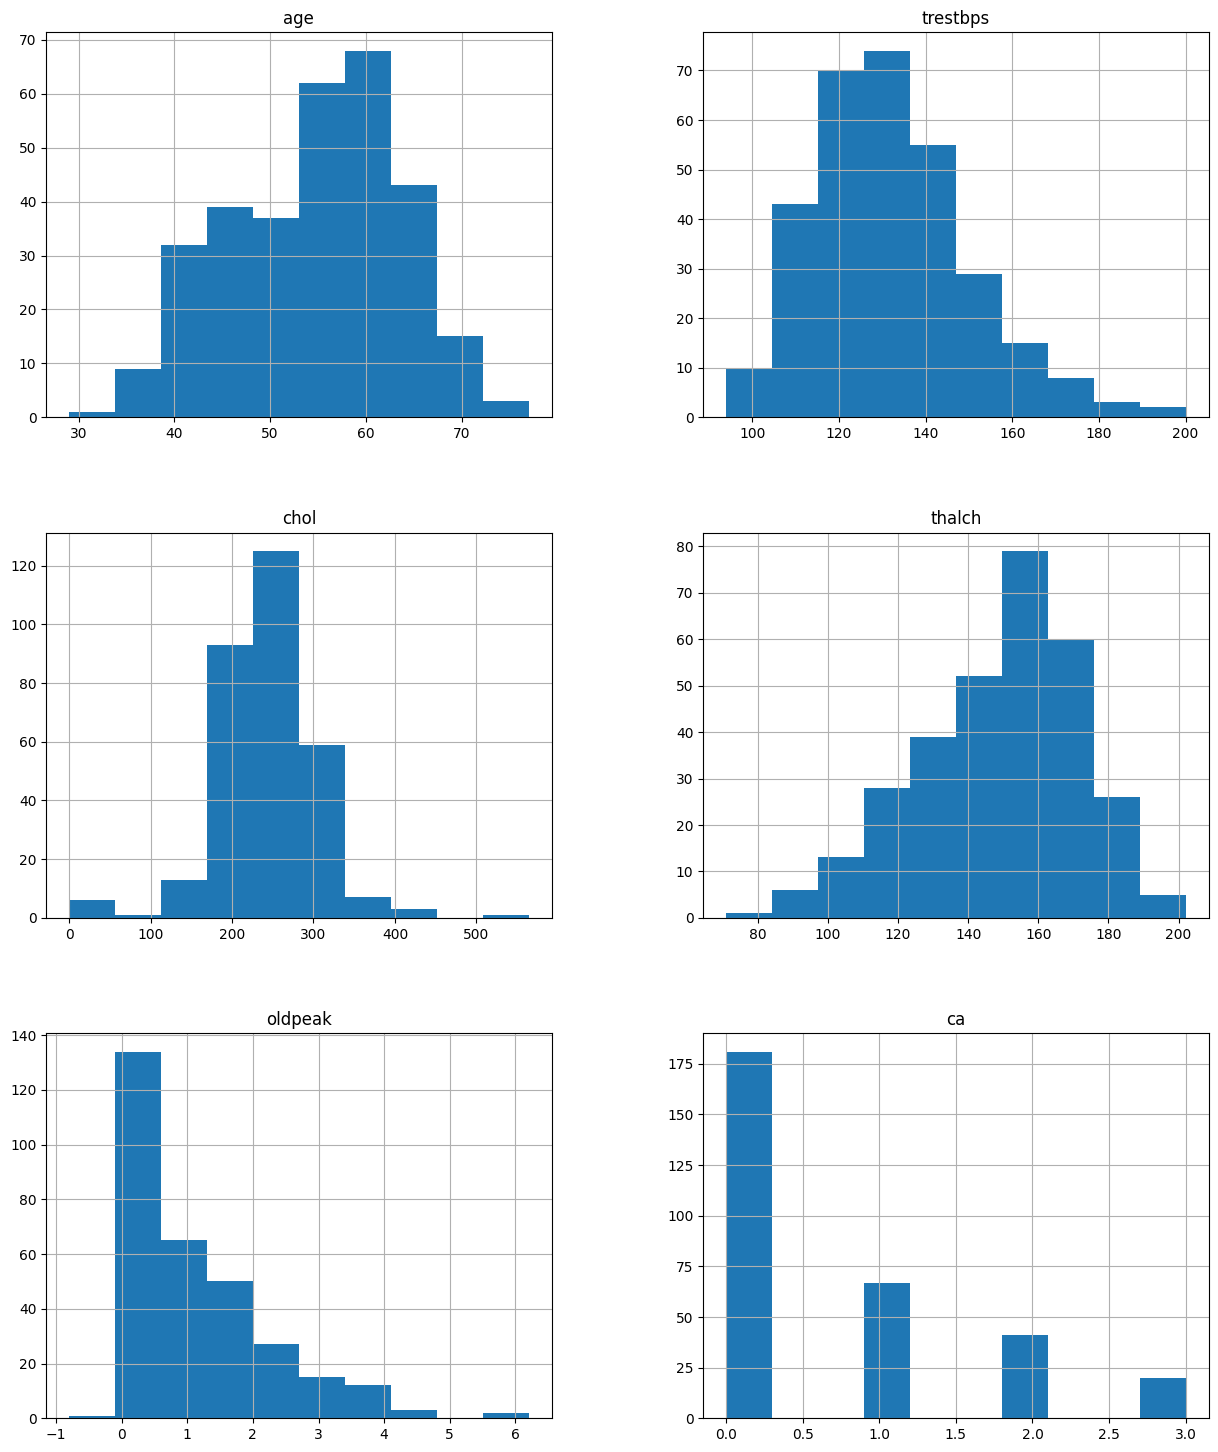

In [19]:
# Histogram of numerical columns
def show_hist(x):
    plt.rcParams["figure.figsize"] = 15,18
    x.hist()
show_hist(df_num)

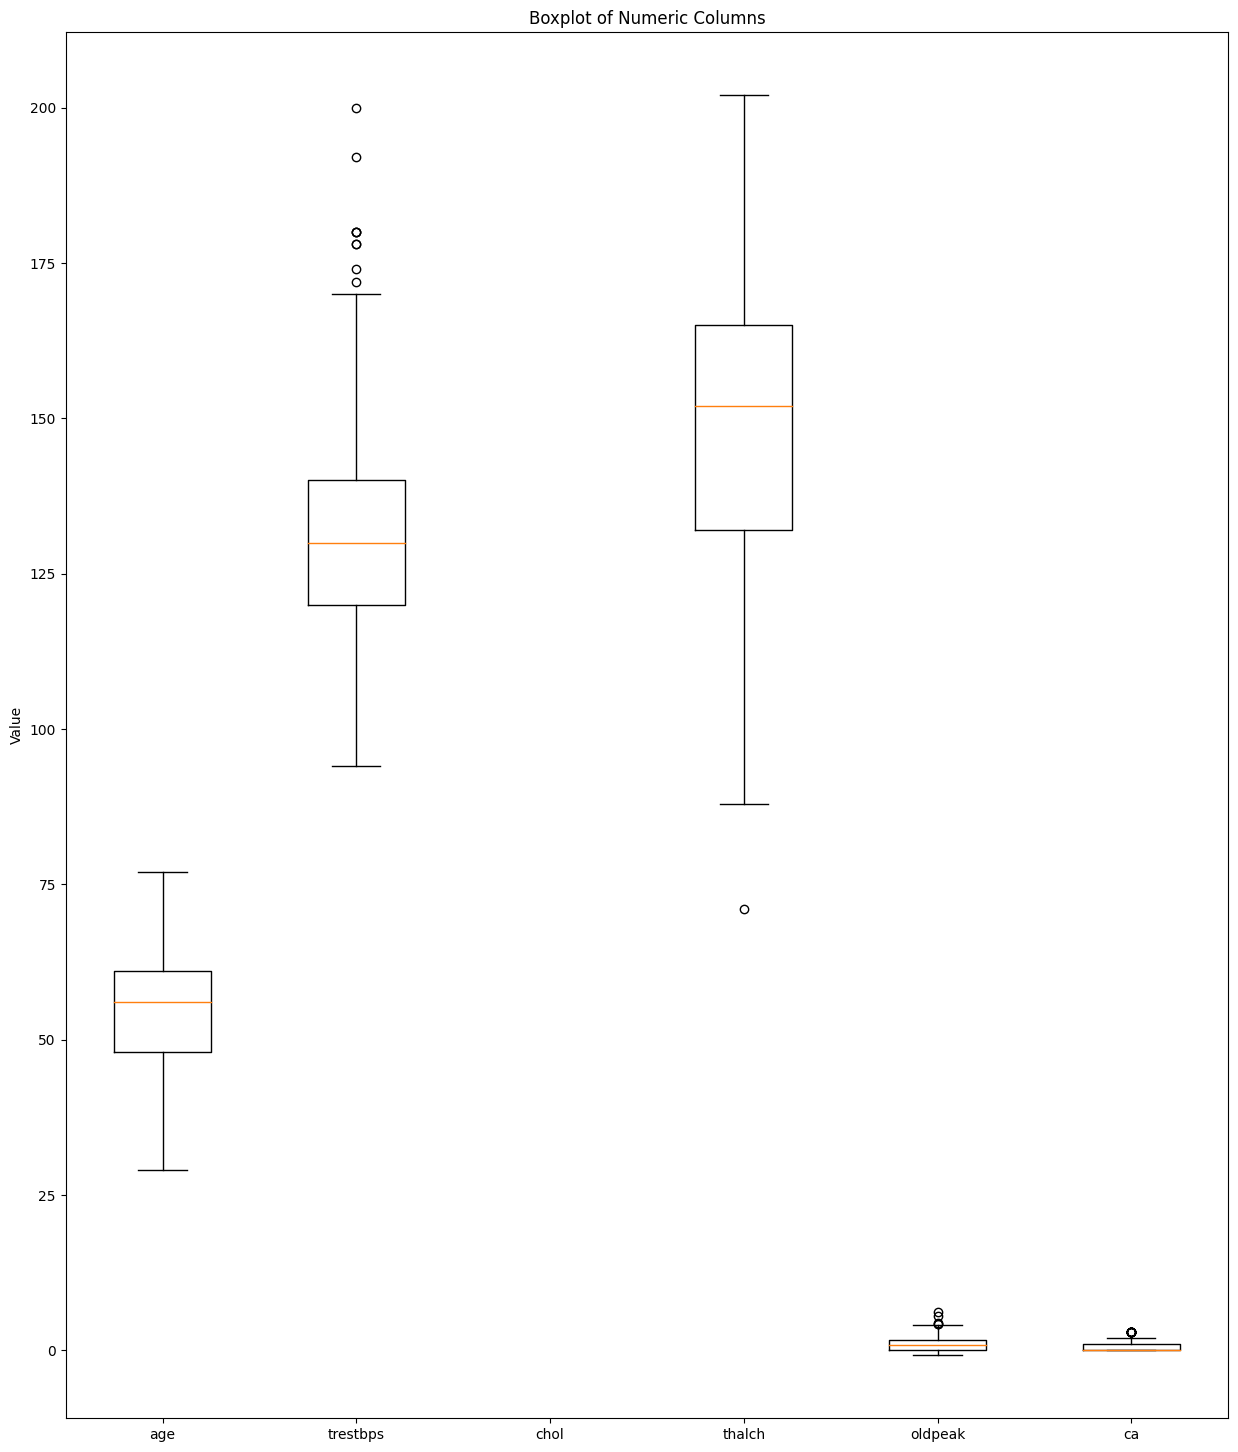

In [20]:
# Boxplot of Numeric Columns
plt.boxplot(df_num.values)

# Set the x-axis tick labels
plt.xticks(range(1, len(df_num.columns) + 1), df_num.columns)

# Set the y-axis label
plt.ylabel("Value")

# Set the title of the boxplot
plt.title("Boxplot of Numeric Columns")

# Display the plot
plt.show()

## Detecting Outliers using IQR Method

In [21]:
# defining a function for detecting outliers using IQR Method
def outlier(x):
    high=0
    q1 = x.quantile(.25)
    q3 = x.quantile(.75)
    iqr = q3-q1
    low = q1-1.5*iqr
    high += q3+1.5*iqr
    outlier = (x.loc[(x < low) | (x > high)])
    return(outlier)
## The Above Code will return this output

outlier_count_chol = outlier(df_num['chol']).count()
outlier_count_trestbps = outlier(df_num['trestbps']).count()
outlier_count_thalch = outlier(df_num['thalch']).count()
outlier_count_age = outlier(df_num['age']).count()
outlier_count_oldpeak = outlier(df_num['oldpeak']).count()
outlier_count_ca = outlier(df_num['ca']).count()

print("Outlier Count for 'chol':", outlier_count_chol)
print("Outlier Count for 'trestbps':", outlier_count_trestbps)
print("Outlier Count for 'thalch':", outlier_count_thalch)
print("Outlier Count for 'age':", outlier_count_age)
print("Outlier Count for 'oldpeak':", outlier_count_oldpeak)
print("Outlier Count for 'ca':", outlier_count_ca)

Outlier Count for 'chol': 12
Outlier Count for 'trestbps': 9
Outlier Count for 'thalch': 1
Outlier Count for 'age': 0
Outlier Count for 'oldpeak': 5
Outlier Count for 'ca': 20


### _Strategy_
The number of outliers by using the inter-quartile range method shows that there are not many outliers present in the dataset; consequently, addressing these may not significantly improve the normal distribution of the data. To handle this, an alternative approach involves dropping values falling below the 5th percentile and above the 95th percentile of the dataset, can give us more pragmatic solution.

In [22]:
df.shape

(309, 14)

# Trimming Data to Deal with Outliers

In [23]:
df.describe([.05, .95])

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,54.647249,0.686084,0.944984,131.708738,240.702265,0.142395,0.540453,148.770227,0.333333,1.043366,1.388350,0.676375,1.320388,0.948220
std,8.971917,0.464835,1.035200,17.659458,63.610386,0.350021,0.542793,23.125061,0.472169,1.155420,0.617384,0.935653,0.579077,1.228941
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,-0.800000,0.000000,0.000000,0.000000,0.000000
5%,40.000000,0.000000,0.000000,108.000000,164.800000,0.000000,0.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,1.000000,0.000000
95%,68.000000,1.000000,3.000000,160.000000,326.600000,1.000000,1.000000,181.600000,1.000000,3.400000,2.000000,3.000000,2.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,4.000000


### _Strategy_
Here, the optimal strategy involves comparing the minimum and maximum values of the columns with their corresponding 5th and 95th percentiles. Notably, significant outliers are identified in two columns, namely `trestbps` and `chol`. So, we trimmed the data through these two columns to mitigate the impact of outliers.

In [24]:
# Data Trimming
df = df[(df['trestbps'] <= 170) & (df['trestbps'] >= 100) & (df['chol'] >=160) & (df['chol'] <=350)].reset_index(drop=True)

In [25]:
# # Data Trimming
# df = df[(df['chol'] <= 350) & (df['oldpeak'] >=0) & (df['oldpeak'] <=4)].reset_index(drop=True)

In [26]:
df.shape

(276, 14)

In [27]:
df_outliers = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']]

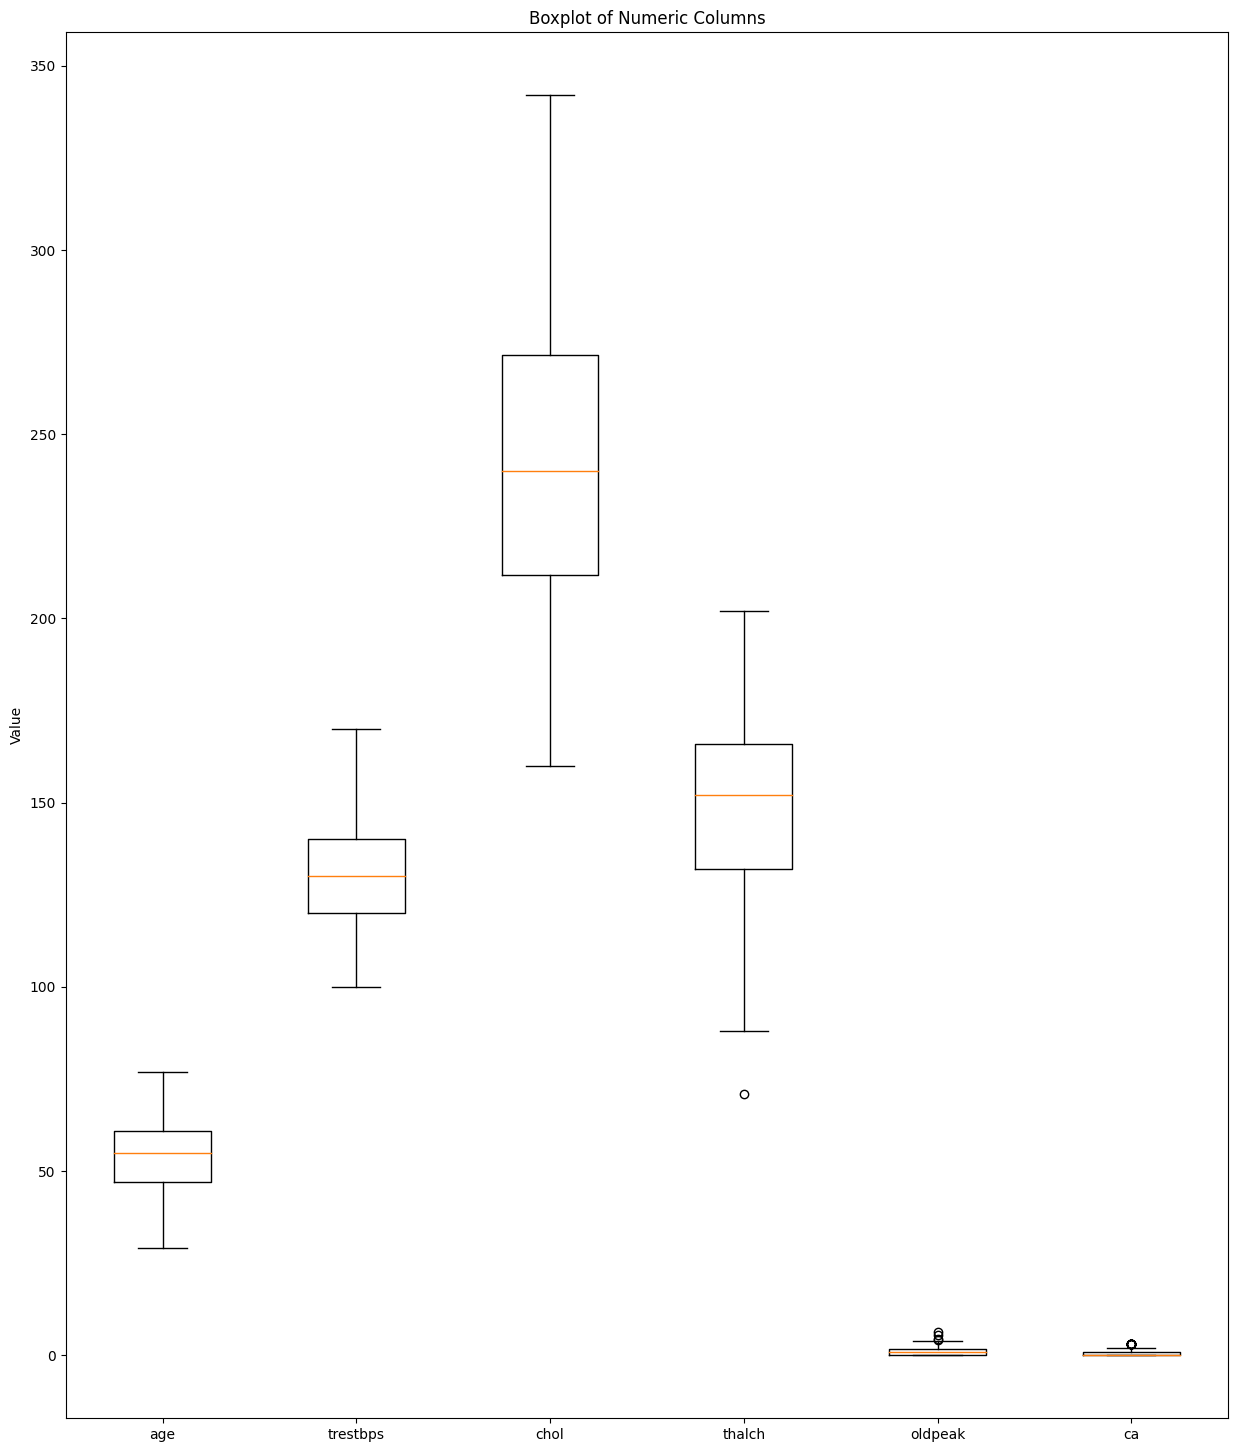

In [28]:
# Boxplot of Numeric Columns
plt.boxplot(df_outliers.values)

# Set the x-axis tick labels
plt.xticks(range(1, len(df_outliers.columns) + 1), df_outliers.columns)

# Set the y-axis label
plt.ylabel("Value")

# Set the title of the boxplot
plt.title("Boxplot of Numeric Columns")

# Display the plot
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       276 non-null    int64  
 1   sex       276 non-null    int64  
 2   cp        276 non-null    int64  
 3   trestbps  276 non-null    float64
 4   chol      276 non-null    float64
 5   fbs       276 non-null    int64  
 6   restecg   276 non-null    int64  
 7   thalch    276 non-null    float64
 8   exang     276 non-null    int64  
 9   oldpeak   276 non-null    float64
 10  slope     276 non-null    int64  
 11  ca        276 non-null    float64
 12  thal      276 non-null    int64  
 13  num       276 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 30.3 KB


# Feature Engineering
Feature engineering is a process in machine learning where raw data is transformed and enhanced to improve the performance of a model. It involves creating new features, modifying existing ones, and optimizing their representation to provide more relevant information to the learning algorithm. The importance of feature engineering lies in its ability to unveil hidden patterns, capture complex relationships, and enhance the predictive power of models. Well-engineered features can significantly boost a model's accuracy, generalization, and interpretability, leading to better insights and more robust predictions. By extracting meaningful information from the raw data, feature engineering empowers machine learning models to better understand and learn from the underlying patterns in the dataset, ultimately contributing to the success of various applications across different domains.

## Feature Creation
Feature creation is a component of feature engineering that involves generating entirely new features based on the existing ones or the problem domain. It goes beyond transforming or modifying existing features; instead, it aims to introduce novel representations that may better capture the underlying patterns in the data. The importance of feature creation lies in its potential to provide the machine learning model with more relevant and discriminative information, thereby enhancing its performance. By crafting new features, machine learning algorithms can gain a deeper understanding of the data, uncover intricate relationships, and improve their ability to make accurate predictions or classifications. Feature creation is particularly valuable in situations where the original features may not fully capture the complexity of the problem, and the introduction of new, insightful variables can significantly contribute to the model's effectiveness.

### _Strategy_

- Data Scaling

Scaling data is a critical preprocessing step that ensures features are on a similar scale, facilitating the optimal performance of various algorithms. It accelerates convergence, enhances model interpretability, and aids regularization techniques contributes to the stability, efficiency, and accuracy of machine learning models across diverse applications.

- Feature Creation

Here, numerical columns are multiplied by the binery columns in order to generate a new feature having the collaborative impact over the target variable (here it is `num`). 

- Encoding Data

Third step is to encode the features which are created using `Label Encoder`. This makes the string columns to that of numeric in type.

- Feature Selection

The last Step is to select the features using the Pearson Correlation method.

Code credited to notebook prepared by [Vitalii Mokin](https://www.kaggle.com/code/vbmokin/uci-heart-disease-data-advanced-fe)

In [30]:
# define the function to scale the numeric columns before feature engineering
def fe_creation(df):
    df['age2'] = df['age']//10
    df['trestbps2'] = df['trestbps']//10
    df['chol2'] = df['chol']//60
    df['thalch2'] = df['thalch']//40
    df['oldpeak2'] = df['oldpeak']//0.4
    # Feature Creation
    for i in ['sex', 'age2', 'fbs', 'restecg', 'exang']:
        for j in ['cp','trestbps2', 'chol2', 'thalch2', 'oldpeak2', 'slope', 'ca', 'thal']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')
    return df

df = fe_creation(df)

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age2,trestbps2,chol2,thalch2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalch2,sex_oldpeak2,sex_slope,sex_ca,sex_thal,age2_cp,age2_trestbps2,age2_chol2,age2_thalch2,age2_oldpeak2,age2_slope,age2_ca,age2_thal,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalch2,fbs_oldpeak2,fbs_slope,fbs_ca,fbs_thal,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalch2,restecg_oldpeak2,restecg_slope,restecg_ca,restecg_thal,exang_cp,exang_trestbps2,exang_chol2,exang_thalch2,exang_oldpeak2,exang_slope,exang_ca,exang_thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0,6,14.0,3.0,3.0,5.0,1_3,1_14.0,1_3.0,1_3.0,1_5.0,1_0,1_0.0,1_0,6_3,6_14.0,6_3.0,6_3.0,6_5.0,6_0,6_0.0,6_0,1_3,1_14.0,1_3.0,1_3.0,1_5.0,1_0,1_0.0,1_0,0_3,0_14.0,0_3.0,0_3.0,0_5.0,0_0,0_0.0,0_0,0_3,0_14.0,0_3.0,0_3.0,0_5.0,0_0,0_0.0,0_0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2,6,16.0,4.0,2.0,3.0,1_0,1_16.0,1_4.0,1_2.0,1_3.0,1_1,1_3.0,1_1,6_0,6_16.0,6_4.0,6_2.0,6_3.0,6_1,6_3.0,6_1,0_0,0_16.0,0_4.0,0_2.0,0_3.0,0_1,0_3.0,0_1,0_0,0_16.0,0_4.0,0_2.0,0_3.0,0_1,0_3.0,0_1,1_0,1_16.0,1_4.0,1_2.0,1_3.0,1_1,1_3.0,1_1
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1,6,12.0,3.0,3.0,6.0,1_0,1_12.0,1_3.0,1_3.0,1_6.0,1_1,1_2.0,1_2,6_0,6_12.0,6_3.0,6_3.0,6_6.0,6_1,6_2.0,6_2,0_0,0_12.0,0_3.0,0_3.0,0_6.0,0_1,0_2.0,0_2,0_0,0_12.0,0_3.0,0_3.0,0_6.0,0_1,0_2.0,0_2,1_0,1_12.0,1_3.0,1_3.0,1_6.0,1_1,1_2.0,1_2
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0,3,13.0,4.0,4.0,8.0,1_2,1_13.0,1_4.0,1_4.0,1_8.0,1_0,1_0.0,1_1,3_2,3_13.0,3_4.0,3_4.0,3_8.0,3_0,3_0.0,3_1,0_2,0_13.0,0_4.0,0_4.0,0_8.0,0_0,0_0.0,0_1,1_2,1_13.0,1_4.0,1_4.0,1_8.0,1_0,1_0.0,1_1,0_2,0_13.0,0_4.0,0_4.0,0_8.0,0_0,0_0.0,0_1
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0,4,13.0,3.0,4.0,3.0,0_1,0_13.0,0_3.0,0_4.0,0_3.0,0_2,0_0.0,0_1,4_1,4_13.0,4_3.0,4_4.0,4_3.0,4_2,4_0.0,4_1,0_1,0_13.0,0_3.0,0_4.0,0_3.0,0_2,0_0.0,0_1,0_1,0_13.0,0_3.0,0_4.0,0_3.0,0_2,0_0.0,0_1,0_1,0_13.0,0_3.0,0_4.0,0_3.0,0_2,0_0.0,0_1


In [32]:
# Creating Function for Encoding Categorical Features to numeric
def str_features_to_numeric(data):
    # Transforms all string features of the df to numeric features
    
    # Determination categorical features
    categorical_columns = []
    numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    features = data.columns.values.tolist()
    for col in features:
        if data[col].dtype in numerics: continue
        categorical_columns.append(col)
    
    # Encoding categorical features
    for col in categorical_columns:
        if col in data.columns:
            le = LabelEncoder()
            le.fit(list(data[col].astype(str).values))
            data[col] = le.transform(list(data[col].astype(str).values))
    
    return data

In [33]:
df = str_features_to_numeric(df)
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,age2,trestbps2,chol2,thalch2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalch2,sex_oldpeak2,sex_slope,sex_ca,sex_thal,age2_cp,age2_trestbps2,age2_chol2,age2_thalch2,age2_oldpeak2,age2_slope,age2_ca,age2_thal,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalch2,fbs_oldpeak2,fbs_slope,fbs_ca,fbs_thal,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalch2,restecg_oldpeak2,restecg_slope,restecg_ca,restecg_thal,exang_cp,exang_trestbps2,exang_chol2,exang_thalch2,exang_oldpeak2,exang_slope,exang_ca,exang_thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0,6,14.0,3.0,3.0,5.0,7,12,5,5,17,3,4,3,16,23,13,11,34,10,10,9,7,12,5,6,19,3,4,3,3,4,1,1,6,0,0,0,3,4,1,2,7,0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2,6,16.0,4.0,2.0,3.0,4,14,6,4,15,4,7,4,13,25,14,10,32,11,13,10,0,6,2,1,7,1,3,1,0,6,2,0,4,1,3,1,4,14,6,5,16,4,7,4
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1,6,12.0,3.0,3.0,6.0,4,10,5,5,18,4,6,5,13,21,13,11,35,11,12,11,0,2,1,2,10,1,2,2,0,2,1,1,7,1,2,2,4,10,5,6,19,4,6,5


In [34]:
df.shape

(276, 59)

## Feature Selection

Feature selection is aimed to identify and retain the most relevant and impactful features from a dataset while discarding irrelevant or redundant ones. It is to improve model performance, reduce computational complexity, and enhance interpretability. Effective feature selection not only mitigates the risk of overfitting by focusing on the most informative attributes but also contributes to a more parsimonious and efficient model. There are various techniques for feature selection, including filter methods that evaluate features independently of the chosen model, wrapper methods that incorporate model performance during feature evaluation, and embedded methods where feature selection is integrated into the model training process.

In [35]:
# Splitting the data into train and target
train = df.copy()
target = train.pop('num')
train.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,age2,trestbps2,chol2,thalch2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalch2,sex_oldpeak2,sex_slope,sex_ca,sex_thal,age2_cp,age2_trestbps2,age2_chol2,age2_thalch2,age2_oldpeak2,age2_slope,age2_ca,age2_thal,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalch2,fbs_oldpeak2,fbs_slope,fbs_ca,fbs_thal,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalch2,restecg_oldpeak2,restecg_slope,restecg_ca,restecg_thal,exang_cp,exang_trestbps2,exang_chol2,exang_thalch2,exang_oldpeak2,exang_slope,exang_ca,exang_thal
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,6,14.0,3.0,3.0,5.0,7,12,5,5,17,3,4,3,16,23,13,11,34,10,10,9,7,12,5,6,19,3,4,3,3,4,1,1,6,0,0,0,3,4,1,2,7,0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,6,16.0,4.0,2.0,3.0,4,14,6,4,15,4,7,4,13,25,14,10,32,11,13,10,0,6,2,1,7,1,3,1,0,6,2,0,4,1,3,1,4,14,6,5,16,4,7,4


In [36]:
num_features_opt = 35   # the number of features that we need to choose as a result
num_features_max = 45   # the somewhat excessive number of features, which we will choose at each stage
features_best = []

## Feature Selection using Pearson Correlation

Pearson Correlation measures the strength and direction of a linear relationship between two continuous variables. Ranging from -1 to 1, a Pearson correlation coefficient of 1 indicates a perfect positive linear relationship, -1 represents a perfect negative linear relationship, and 0 suggests no linear correlation. High positive correlations signify that as one variable increases, the other tends to increase as well, while high negative correlations indicate that as one variable increases, the other tends to decrease. 

### _Strategy_

- Threshold and Dropping Features

Here, the threshold of 85% is set for removing the highly correlated features in the dataset. It is important to remove such features because of two important reasons: avoiding the issue of multicollinearity and the issue of feature redundancy.
- Different Other Models for Feature Selection
There are various other models like SVC, Lasso and RFE. Here, these methods are taken as optional.

In [37]:
# Threshold for removing correlated variables
threshold = 0.85

def highlight(value):
    if value > threshold:
        style = 'background-color: red'
    else:
        style = 'background-color: blue'
    return style

# # Absolute value correlation matrix
corr_matrix = train.corr().abs().round(2)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.style.format("{:.2f}").applymap(highlight)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,age2,trestbps2,chol2,thalch2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalch2,sex_oldpeak2,sex_slope,sex_ca,sex_thal,age2_cp,age2_trestbps2,age2_chol2,age2_thalch2,age2_oldpeak2,age2_slope,age2_ca,age2_thal,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalch2,fbs_oldpeak2,fbs_slope,fbs_ca,fbs_thal,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalch2,restecg_oldpeak2,restecg_slope,restecg_ca,restecg_thal,exang_cp,exang_trestbps2,exang_chol2,exang_thalch2,exang_oldpeak2,exang_slope,exang_ca,exang_thal
age,nan,0.06,0.05,0.27,0.15,0.11,0.11,0.39,0.08,0.19,0.14,0.40,0.04,0.95,0.27,0.12,0.34,0.18,0.08,0.05,0.01,0.18,0.06,0.12,0.12,0.04,0.92,0.93,0.93,0.92,0.91,0.92,0.93,0.93,0.06,0.22,0.16,0.05,0.22,0.02,0.30,0.12,0.12,0.01,0.06,0.20,0.02,0.15,0.07,0.08,0.06,0.18,0.12,0.05,0.15,0.02,0.24,0.09
sex,nan,nan,0.09,0.03,0.11,0.05,0.05,0.06,0.19,0.15,0.07,0.10,0.22,0.09,0.02,0.13,0.06,0.16,0.86,0.92,0.91,0.93,0.84,0.91,0.90,0.93,0.11,0.09,0.11,0.12,0.04,0.11,0.06,0.04,0.01,0.04,0.02,0.02,0.15,0.01,0.09,0.16,0.09,0.05,0.10,0.06,0.04,0.07,0.01,0.03,0.15,0.17,0.12,0.18,0.22,0.16,0.20,0.24
cp,nan,nan,nan,0.07,0.06,0.10,0.06,0.29,0.37,0.14,0.09,0.22,0.18,0.05,0.08,0.05,0.23,0.14,0.43,0.05,0.11,0.01,0.12,0.05,0.18,0.15,0.22,0.03,0.06,0.00,0.08,0.03,0.09,0.09,0.65,0.12,0.06,0.19,0.01,0.14,0.04,0.00,0.49,0.09,0.04,0.12,0.02,0.09,0.03,0.01,0.19,0.31,0.36,0.31,0.32,0.34,0.41,0.39
trestbps,nan,nan,nan,nan,0.08,0.10,0.14,0.07,0.02,0.16,0.09,0.11,0.01,0.25,0.98,0.04,0.06,0.16,0.01,0.36,0.01,0.05,0.05,0.07,0.02,0.02,0.27,0.46,0.25,0.25,0.27,0.23,0.26,0.24,0.12,0.56,0.11,0.07,0.17,0.04,0.14,0.10,0.09,0.23,0.11,0.14,0.06,0.16,0.08,0.12,0.07,0.40,0.04,0.00,0.09,0.02,0.06,0.02
chol,nan,nan,nan,nan,nan,0.03,0.10,0.01,0.04,0.04,0.06,0.16,0.07,0.14,0.07,0.93,0.01,0.04,0.13,0.07,0.28,0.11,0.10,0.08,0.03,0.07,0.12,0.14,0.32,0.14,0.11,0.15,0.15,0.15,0.01,0.06,0.48,0.02,0.01,0.06,0.11,0.06,0.11,0.07,0.24,0.10,0.10,0.07,0.03,0.07,0.01,0.07,0.40,0.04,0.02,0.07,0.10,0.06
fbs,nan,nan,nan,nan,nan,nan,0.07,0.02,0.00,0.00,0.05,0.14,0.07,0.10,0.08,0.01,0.04,0.00,0.10,0.08,0.06,0.04,0.06,0.03,0.11,0.02,0.12,0.10,0.10,0.09,0.10,0.09,0.11,0.08,0.82,0.88,0.87,0.89,0.73,0.85,0.85,0.86,0.02,0.04,0.06,0.08,0.05,0.09,0.01,0.09,0.06,0.03,0.00,0.02,0.02,0.03,0.06,0.03
restecg,nan,nan,nan,nan,nan,nan,nan,0.04,0.10,0.03,0.07,0.09,0.01,0.09,0.13,0.08,0.09,0.03,0.02,0.10,0.09,0.02,0.08,0.02,0.08,0.04,0.08,0.11,0.11,0.07,0.11,0.08,0.10,0.09,0.02,0.12,0.11,0.03,0.09,0.03,0.10,0.06,0.90,0.93,0.93,0.96,0.89,0.93,0.91,0.94,0.07,0.14,0.12,0.07,0.11,0.07,0.12,0.08
thalch,nan,nan,nan,nan,nan,nan,nan,nan,0.39,0.33,0.38,0.26,0.13,0.38,0.09,0.04,0.90,0.31,0.10,0.09,0.04,0.27,0.23,0.11,0.16,0.10,0.29,0.36,0.35,0.19,0.43,0.30,0.39,0.39,0.15,0.05,0.00,0.39,0.25,0.18,0.15,0.08,0.16,0.01,0.06,0.27,0.11,0.17,0.07,0.01,0.24,0.39,0.34,0.06,0.44,0.22,0.44,0.38
exang,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.31,0.25,0.15,0.22,0.10,0.03,0.02,0.33,0.31,0.02,0.19,0.19,0.06,0.33,0.07,0.23,0.24,0.01,0.09,0.10,0.02,0.18,0.04,0.12,0.14,0.22,0.01,0.01,0.15,0.22,0.14,0.08,0.11,0.25,0.09,0.09,0.18,0.06,0.18,0.03,0.01,0.84,0.92,0.92,0.93,0.90,0.90,0.91,0.94
oldpeak,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.56,0.30,0.20,0.20,0.18,0.07,0.31,0.99,0.07,0.21,0.12,0.04,0.59,0.09,0.26,0.20,0.16,0.23,0.18,0.15,0.43,0.08,0.26,0.24,0.08,0.09,0.04,0.14,0.58,0.29,0.16,0.10,0.09,0.03,0.07,0.12,0.38,0.22,0.09,0.04,0.25,0.36,0.26,0.21,0.64,0.07,0.39,0.34


In [38]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]
# Filter the columns to remove collinear features
features_filtered = train.drop(columns = collinear_features)
print('The number of features that passed the collinearity threshold: ', features_filtered.shape[1])
features_best.append(features_filtered.columns.tolist())

The number of features that passed the collinearity threshold:  19


In [39]:
features_best

[['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalch',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal',
  'sex_oldpeak2',
  'fbs_cp',
  'fbs_oldpeak2',
  'fbs_slope',
  'fbs_ca',
  'exang_cp']]

# Feature Selection using Linear SVC - Optional

In [40]:
# lsvc = LinearSVC(C=0.1, penalty="l1", dual=False).fit(train, target)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(train)
# X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
# features_best.append(X_selected_df.columns.tolist())

# Feature Selection Using Lasso - Optional

In [41]:
# lasso = LassoCV(cv=3).fit(train, target)
# model = SelectFromModel(lasso, prefit=True)
# X_new = model.transform(train)
# X_selected_df = pd.DataFrame(X_new, columns=[train.columns[i] for i in range(len(train.columns)) if model.get_support()[i]])
# features_best.append(X_selected_df.columns.tolist())

# Feature Selection using Recursive Feature Elimination (RFE) with Logistic Regression - Optional

In [42]:
# rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_features_max, step=10, verbose=5)
# rfe_selector.fit(train, target)
# rfe_support = rfe_selector.get_support()
# rfe_feature = train.loc[:,rfe_support].columns.tolist()
# print(str(len(rfe_feature)), 'selected features')
# features_best.append(rfe_feature)

# Feature Selection using RFE with Random Forest - Optional

In [43]:
# embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
# embeded_rf_selector.fit(train, target)
# embeded_rf_support = embeded_rf_selector.get_support()
# embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
# print(str(len(embeded_rf_feature)), 'selected features')
# features_best.append(embeded_rf_feature)

# REF with Random Forest - Optional

In [44]:
# embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=200), threshold='1.25*median')
# embeded_rf_selector.fit(train, target)
# embeded_rf_support = embeded_rf_selector.get_support()
# embeded_rf_feature = train.loc[:,embeded_rf_support].columns.tolist()
# print(str(len(embeded_rf_feature)), 'selected features')
# features_best.append(embeded_rf_feature)

# Hyperparameter Tunning & Model Selection
Hyperparameter tuning and model selection are very important tools of building robust and high-performing machine learning models. Hyperparameters are external configurations that guide the learning process but are not learned from the data. It involves the systematic optimization of the parameters to enhance a model's performance. This process often employs techniques like grid search, exploring different combinations of hyperparameter values to find the optimal set that maximizes model accuracy or other performance metrics. 
Model selection, on the other hand, involves choosing the most suitable algorithm or model architecture for a specific task. It requires evaluating and comparing the performance of different models using cross-validation or other validation strategies. Balancing model complexity, interpretability, and predictive accuracy is essential in making informed choices during model selection. 
Both hyperparameter tuning and model selection are iterative processes that aim to improve the generalization ability of machine learning models and ensure their effectiveness.

In [45]:
# creating a copy of dataframe having best selected features
df_01 = train.loc[:, features_best[0]]

In [46]:
df_01.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_oldpeak2,fbs_cp,fbs_oldpeak2,fbs_slope,fbs_ca,exang_cp
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,17,7,19,3,4,3
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,15,0,7,1,3,4
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,18,0,10,1,2,4
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,20,2,12,0,0,2
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,4,1,7,2,0,1


In [47]:
df_01.shape

(276, 19)

In [48]:
X = df_01
y = target # target feature which is `num`

In [49]:
# Define models with hyperparameter grids for tuning
models = {
    'Logistic Regression': (LogisticRegression(multi_class='multinomial', solver='lbfgs'), 
                            {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
                            ),
    'XGBoost': (XGBClassifier(), 
                                    {'n_estimators': [50, 100, 200],
                                   'learning_rate': [0.001, 0.01, 0.1, 1],
                                   'max_depth': [3, 5, 7],
                                   'gamma': [0, 0.1, 0.2, 0.3]}
                ),
    'Random Forest': (RandomForestClassifier(), 
                                                  {'n_estimators': [50, 100, 200],
                                                 'max_depth': [None, 10, 20, 30],
                                                 'min_samples_split': [2, 5, 10],
                                                 'min_samples_leaf': [1, 2, 4]}
                      ),
    'Decision Tree': (DecisionTreeClassifier(), 
                                                  {'max_depth': [None, 10, 20, 30],
                                                 'min_samples_split': [2, 5, 10],
                                                 'min_samples_leaf': [1, 2, 4]}
                      ),
    'Gradient Boosting': (GradientBoostingClassifier(), #'n_estimators': [100]
                                                          {'n_estimators': [50, 100, 200],
                                                         'learning_rate': [0.001, 0.01, 0.1, 1],
                                                         'max_depth': [3, 5, 7]}
                          ),
    'SVM': (SVC(), 
                    {'C': [0.001, 0.01, 0.1, 1, 10],
                    'kernel': ['linear', 'rbf'],
                    'gamma': ['scale', 'auto']}
            ),
    'KNN': (KNeighborsClassifier(), #'n_neighbors': [10]
                                      {'n_neighbors': [3, 5, 7],
                                     'weights': ['uniform', 'distance'],
                                     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
            ),
    'Extra Gradient': (ExtraTreesClassifier(), 
                                                {'n_estimators': [50, 100, 200],
                                                'max_depth': [None, 10, 20, 30],
                                                'min_samples_split': [2, 5, 10],
                                                'min_samples_leaf': [1, 2, 4]}
                       ),
    'Ada Boost': (AdaBoostClassifier(), 
                                          {'n_estimators': [50, 100, 200],
                                         'learning_rate': [0.001, 0.01, 0.1, 1]}
                  ),
    'Bagging': (BaggingClassifier(), 
                                        {'n_estimators': [50, 100, 200],
                                       'max_samples': [1.0, 0.8, 0.6],
                                       'max_features': [1.0, 0.8, 0.6]}
                ),
    'CatBoost': (CatBoostClassifier(verbose=False),
                                                    {'n_estimators': [50, 100, 200],
                                                      'learning_rate': [0.001, 0.01, 0.1, 1],
                                                      'depth': [4, 6, 8, 10]}
                 ),
    'Light GBM': (LGBMClassifier(verbose=-1), 
                                              {'n_estimators': [50, 100, 200],
                                               'learning_rate': [0.001, 0.01, 0.1, 1],
                                                'max_depth': [3, 5, 7]}
                  ),

    'Naive Bayes': (GaussianNB(), {})
}

In [50]:
%%time
# Create a DataFrame to store results
results_table = pd.DataFrame(columns=['Model', 'Mean Accuracy', 'Mean Precision', 'Mean Recall', 'Mean F1'])

# Keep track of the top three models based on F1 score and their hyperparameters
top_models = {'Model': [], 'Mean F1': [], 'Best Hyperparameters': []}

# Evaluate models and select the best based on multiple metrics
for model_name, (model, original_param_grid) in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])

    # Include classifier name in the parameter grid for GridSearchCV
    param_grid = {f'classifier__{key}': value for key, value in original_param_grid.items()}

    # Define a composite scoring function (you can customize weights based on your preferences)
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision_weighted',
        'recall': 'recall_weighted',
        'f1': 'f1_weighted'
    }

    # Use cross-validation with the composite scoring function
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=scoring, refit='f1', return_train_score=False)
    grid_search.fit(X, y)

    # Get the best model and its performance on multiple metrics
    best_model_name = model_name
    results = grid_search.cv_results_

    # Calculate mean scores for each fold
    mean_accuracy = results["mean_test_accuracy"].mean()
    mean_precision = results["mean_test_precision"].mean()
    mean_recall = results["mean_test_recall"].mean()
    mean_f1 = results["mean_test_f1"].mean()

    # Instead of results_table = results_table.append(...)
    results_table = pd.concat([results_table, pd.DataFrame([{'Model': model_name,
                                                          'Mean Accuracy': mean_accuracy,
                                                          'Mean Precision': mean_precision,
                                                          'Mean Recall': mean_recall,
                                                          'Mean F1': mean_f1}])], ignore_index=True)

    # Update the top_models dictionary
    if len(top_models['Model']) < 3 or mean_f1 > min(top_models['Mean F1']):
        top_models['Model'].append(model_name)
        top_models['Mean F1'].append(mean_f1)
        top_models['Best Hyperparameters'].append(grid_search.best_params_)

        # Keep only the top three models
        top_models['Model'] = top_models['Model'][:3]
        top_models['Mean F1'] = top_models['Mean F1'][:3]
        top_models['Best Hyperparameters'] = top_models['Best Hyperparameters'][:3]

# Display the results table
print('\nResults of Applied Models:')
print(results_table.to_string(index=False, line_width=1000))

# Display the top three models based on F1 score and their well-performed hyperparameters
print('\nTop Three Models based on F1 Score:')
top_models_df = pd.DataFrame(top_models)
print(top_models_df)


Results of Applied Models:
              Model  Mean Accuracy  Mean Precision  Mean Recall  Mean F1
Logistic Regression       0.558664        0.449646     0.558664 0.491094
            XGBoost       0.541741        0.500294     0.541741 0.514412
      Random Forest       0.576271        0.486958     0.576271 0.518570
      Decision Tree       0.531118        0.517866     0.531118 0.514797
  Gradient Boosting       0.529328        0.424887     0.529328 0.459939
                SVM       0.555139        0.383665     0.555139 0.444041
                KNN       0.503814        0.398454     0.503814 0.436637
     Extra Gradient       0.574178        0.490134     0.574178 0.515566
          Ada Boost       0.546131        0.459884     0.546131 0.487881
            Bagging       0.564227        0.486952     0.564227 0.516317
           CatBoost       0.572280        0.475479     0.572280 0.508229
          Light GBM       0.558671        0.441599     0.558671 0.479824
        Naive Bayes    

### _Conclusion:_

The observed performance metrics, including `mean accuracy` and `F1 Score`, indicate suboptimal results for all models. Consequently, we cannot rely on these models for predictions. To address this issue, a strategic focus on` target engineering` becomes imperative. By enhancing the representation and characteristics of the target variable `num`, we aim to significantly improve the overall performance and effectiveness of the machine learning model.

# Target Engineering

Target Engineering in machine learning refers to the process of manipulating or transforming the target variable (dependent variable) in a dataset to improve the performance of a predictive model. The primary goal is to enhance the learning process and the model's ability to make accurate predictions. Target engineering encompasses a variety of techniques, such as transforming the target variable to meet certain distributional assumptions, creating new target labels or categories, or aggregating and modifying the target values to address specific challenges in the data. The objective is to extract more meaningful information from the target variable, making it more amenable to the learning algorithm and improving the overall effectiveness of the machine learning model.

### _Strategy_

- Binning

Converting the target column into a binary category is a common strategy, especially when dealing with the multi-categorical target variable. In the context of heart disease prediction, the proposed approach involves assigning the label '1' to all instances representing the presence of heart disease and '0' to those indicating its absence. This binary encoding simplifies the prediction task, allowing the ML model to discern between the two outcomes more effectively. However, it's essential to ensure that this transformation aligns with the goals of the analysis and does not introduce biases or oversimplify the underlying patterns in the data. Additionally, model evaluation and interpretation should consider the chosen encoding scheme to accurately assess predictive performance.

- Dealing with Imbalance Data

In the Data Exploration section, it was observed that there is an imbalance in the `num` feature, with a disproportionate number of values concentrated in the category '0' compared to other individual categories. Addressing this imbalance is crucial for enhancing the model's effectiveness. In line with the aforementioned discussion, employing the binning technique emerges as a strategic approach to mitigate this issue. By reorganizing the 'num' feature into defined bins, we can better capture patterns and relationships, potentially leading to an improved and more balanced performance of the machine learning model.
- Hypertunning and Model Selection

The last step is to hypertune different models and select the best one for further training and predicting the target.

In [51]:
X = df_01
y = target
# replace 1 with 0 and all others to 1
y = np.where((y == 1) | (y == 2) | (y == 3) | (y == 4), 1,0)

In [52]:
%%time
# Create a DataFrame to store results
results_table = pd.DataFrame(columns=['Model', 'Mean Accuracy', 'Mean Precision', 'Mean Recall', 'Mean F1'])

# Keep track of the top three models based on F1 score and their hyperparameters
top_models = {'Model': [], 'Mean F1': [], 'Best Hyperparameters': []}

# Evaluate models and select the best based on multiple metrics
for model_name, (model, original_param_grid) in models.items():
    pipeline = Pipeline(steps=[('classifier', model)])

    # Include classifier name in the parameter grid for GridSearchCV
    param_grid = {f'classifier__{key}': value for key, value in original_param_grid.items()}

    # Define a composite scoring function (you can customize weights based on your preferences)
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision_weighted',
        'recall': 'recall_weighted',
        'f1': 'f1_weighted'
    }

    # Use cross-validation with the composite scoring function
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring=scoring, refit='f1', return_train_score=False)
    grid_search.fit(X, y)

    # Get the best model and its performance on multiple metrics
    best_model_name = model_name
    results = grid_search.cv_results_

    # Calculate mean scores for each fold
    mean_accuracy = results["mean_test_accuracy"].mean()
    mean_precision = results["mean_test_precision"].mean()
    mean_recall = results["mean_test_recall"].mean()
    mean_f1 = results["mean_test_f1"].mean()

    # Instead of results_table = results_table.append(...)
    results_table = pd.concat([results_table, pd.DataFrame([{'Model': model_name,
                                                          'Mean Accuracy': mean_accuracy,
                                                          'Mean Precision': mean_precision,
                                                          'Mean Recall': mean_recall,
                                                          'Mean F1': mean_f1}])], ignore_index=True)

    # Update the top_models dictionary
    if len(top_models['Model']) < 3 or mean_f1 > min(top_models['Mean F1']):
        top_models['Model'].append(model_name)
        top_models['Mean F1'].append(mean_f1)
        top_models['Best Hyperparameters'].append(grid_search.best_params_)

        # Keep only the top three models
        top_models['Model'] = top_models['Model'][:3]
        top_models['Mean F1'] = top_models['Mean F1'][:3]
        top_models['Best Hyperparameters'] = top_models['Best Hyperparameters'][:3]

# Display the results table
print('\nResults of Applied Models:')
print(results_table.to_string(index=False, line_width=1000))

# Display the top three models based on F1 score and their well-performed hyperparameters
print('\nTop Three Models based on F1 Score:')
top_models_df = pd.DataFrame(top_models)
print(top_models_df)


Results of Applied Models:
              Model  Mean Accuracy  Mean Precision  Mean Recall  Mean F1
Logistic Regression       0.817879        0.828784     0.817879 0.815153
            XGBoost       0.781239        0.774136     0.781239 0.763563
      Random Forest       0.832143        0.839372     0.832143 0.830572
      Decision Tree       0.777260        0.787428     0.777260 0.775148
  Gradient Boosting       0.770995        0.759405     0.770995 0.754802
                SVM       0.690165        0.610386     0.690165 0.624192
                KNN       0.674317        0.681800     0.674317 0.670020
     Extra Gradient       0.833226        0.840603     0.833226 0.831707
          Ada Boost       0.791193        0.802920     0.791193 0.788478
            Bagging       0.817529        0.823866     0.817529 0.815672
           CatBoost       0.827218        0.838309     0.827218 0.825077
          Light GBM       0.783491        0.779223     0.783491 0.765639
        Naive Bayes    

It can be inferred that the top three models as per mean F1 results are Logistic Regresssion, XG Bost and Random Forest. Now, the final step is to predict the `num` value using anyone of these models. Here, we are choosen `Random Forest Classifier`.

In [53]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
# Create an instance of the RandomForestClassifier
classifier = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best classifier after hyperparameter tuning
best_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best classifier
y_pred = best_classifier.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)
# Get the F1 result
f1 = f1_score(y_test, y_pred)
print("F1 score on the test set:", f1)
# Get the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", confusion_matrix)
# get the classification report
classification_report = classification_report(y_test, y_pred)
print("Classification report:\n", classification_report)

Accuracy on the test set: 0.8571428571428571
F1 score on the test set: 0.7894736842105263
Confusion matrix:
 [[33  4]
 [ 4 15]]
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89        37
           1       0.79      0.79      0.79        19

    accuracy                           0.86        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.86      0.86      0.86        56



## Final Words:

As per result, the model is having around 86% precision score which is quite acceptable to predict the heart disease in an individual based upon the characteristics of age, sex, cp	trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal, sex_oldpeak,	fbs_cp, fbs_oldpeak, fbs_slope and fbs_caexang_cp.